# The python imaging library

The Python Imaging Library is used for image manipulation. It can be imported using:

In [1]:
import PIL

And details about its version can be seen using:

In [2]:
PIL.__version__

'10.0.1'

Typically the ```Image``` module is imported using:

In [3]:
from PIL import Image

Image data is essentially in the form of an ```NDarray```. A four pixel black and white numpy array can be created using a bool datatype:

In [4]:
import numpy as np

In [5]:
image_data = np.array([[0, 1],
                       [1, 0]], dtype=bool)

An instance of the ```Image``` class can be initialised using the function ```fromarray```:

In [6]:
image = Image.fromarray(image_data)

Note that the ```Image``` class is found in the ```Image``` module:

In [7]:
type(image)

PIL.Image.Image

This image can be displayed using the ```pyplot``` function ```imshow```:

In [8]:
import matplotlib.pyplot as plt

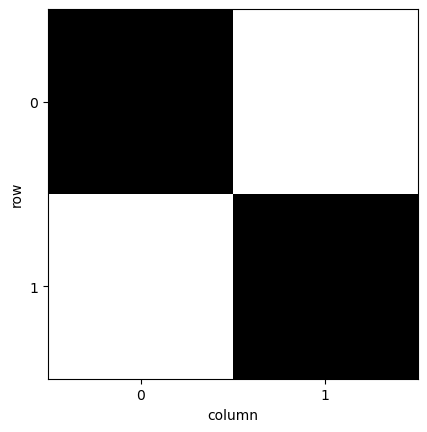

In [9]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

A grayscale image typically uses an unsigned 8 bit integer datatype with values ranging from ```0:256``` where the minimum value ```0``` is black, the maximum value ```255``` is white and intermediate values are gray. Conceptualise each pixel on a computer screen as a white LED that has a brightness that scales to this 8 bit integer:

In [11]:
image_data = np.array([[000,  85],
                       [170, 255]], dtype=np.uint8)

In [12]:
image = Image.fromarray(image_data)

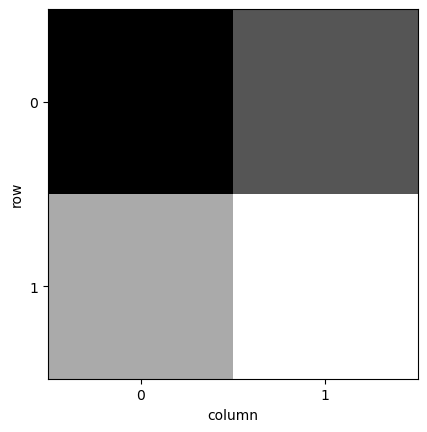

In [13]:
fig, ax = plt.subplots();
ax.imshow(image, cmap='gray', interpolation='none');
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The human eye has three color receptors that are short wavelength (blue) sensitive, medium wavelength (green) sensitive and long wavelength (red) sensitive. Each pixel in a computer screen is effectively a Red, Green, Blue (RGB) LED and each color channel has an independent 8 bit unsigned integer that controls the perspective LEDs brightness. The color for each pixel is therefore expressed using a 3 element ```tuple``` of the form ```(r, g, b)```:

In [14]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0)],
                       [(  0, 255,   0), (   0,  0, 255)]], dtype=np.uint8)

In [15]:
image = Image.fromarray(image_data)

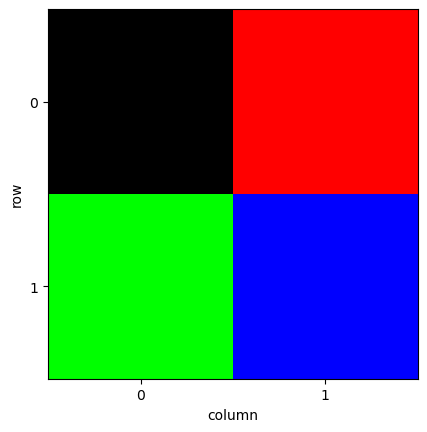

In [16]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

The above diagram shows the absense of color (black) and the three primary colors (red, green and blue). Physiologically our eyes measure light ratios at these wavelengths and our brain maps these ratios to a color. The three secondary colors are the result of mixing light of maximum intensity from two color channels cyan (green and blue), magenta (red and blue), yellow (red and green). If all three channels are at maximum intensity white (red, green and blue) is perceived:

In [47]:
image_data = np.array([[(  0,   0,   0), (255,   0,   0), (  0, 255,   0), (  0,   0, 255)],
                       [(  0, 255, 255), (255,   0, 255), (255, 255,   0), (255, 255, 255)]], dtype=np.uint8)

In [18]:
image = Image.fromarray(image_data)

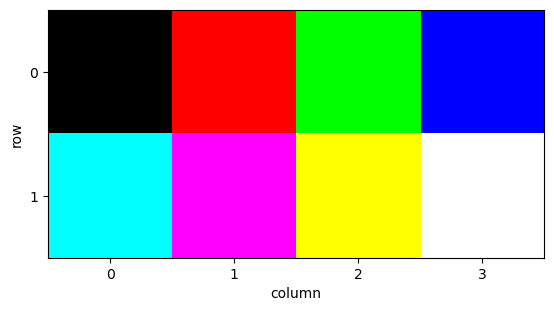

In [20]:
fig, ax = plt.subplots();
ax.imshow(image);
ax.set_xticks(np.arange(4), [str(i) for i in range(4)]);
ax.set_yticks(np.arange(2), [str(i) for i in range(2)]);
ax.set_xlabel('column');
ax.set_ylabel('row');

In [50]:
image_data = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

In [51]:
import PIL.ImageColor

In [52]:
 
PIL.ImageColor.getcolor('#ff0000', 'RGB')

(255, 0, 0)

In [53]:
image_data.shape

(2, 4)

In [55]:
image_data.flatten()

array(['#000000', '#ff0000', '#00ff00', '#0000ff', '#00ffff', '#ff00ff',
       '#ffff00', '#ffff00'], dtype='<U7')

In [ ]:
np.vectorize()

In [36]:
def hex_to_rgb(hex_color):
    rgb_tuple = PIL.ImageColor.getcolor(hex_color, 'RGB')
    return tuple(int(x) for x in rgb_tuple)

In [37]:
rgb_tuples = np.vectorize(hex_to_rgb)(image_data)

In [38]:
rgb_tuples

(array([[  0, 255,   0,   0],
        [  0, 255, 255, 255]]),
 array([[  0,   0, 255,   0],
        [255,   0, 255, 255]]),
 array([[  0,   0,   0, 255],
        [255, 255,   0,   0]]))

In [39]:

import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple
def hex_to_rgb(hex_color):
    rgb_tuple = ImageColor.getcolor(hex_color, "RGB")
    return tuple(int(x) for x in rgb_tuple)

# Array of hexadecimal color values (2D)
image_data = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
rgb_tuples = np.vectorize(hex_to_rgb)(image_data)

print("Hexadecimal colors:")
print(image_data)
print("\nRGB tuples:")
print(rgb_tuples)

Hexadecimal colors:
[['#000000' '#ff0000' '#00ff00' '#0000ff']
 ['#00ffff' '#ff00ff' '#ffff00' '#ffff00']]

RGB tuples:
(array([[  0, 255,   0,   0],
       [  0, 255, 255, 255]]), array([[  0,   0, 255,   0],
       [255,   0, 255, 255]]), array([[  0,   0,   0, 255],
       [255, 255,   0,   0]]))


In [40]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple
def hex_to_rgb(hex_color):
    rgb_tuple = ImageColor.getcolor(hex_color, "RGB")
    return rgb_tuple[:3]  # Extract only the RGB values

# Array of hexadecimal color values (2D)
image_data = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
rgb_tuples = np.vectorize(hex_to_rgb)(image_data)

print("Hexadecimal colors:")
print(image_data)
print("\nRGB tuples:")
print(rgb_tuples)


Hexadecimal colors:
[['#000000' '#ff0000' '#00ff00' '#0000ff']
 ['#00ffff' '#ff00ff' '#ffff00' '#ffff00']]

RGB tuples:
(array([[  0, 255,   0,   0],
       [  0, 255, 255, 255]]), array([[  0,   0, 255,   0],
       [255,   0, 255, 255]]), array([[  0,   0,   0, 255],
       [255, 255,   0,   0]]))


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x2 pixels
image = Image.new('RGB', (2, 2))

# Set individual pixel colors
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # k, r, g, b

# Assign the colors to the pixels
image.putpixel((0, 0), pixel_colors[0])  # Black
image.putpixel((1, 0), pixel_colors[1])  # Red
image.putpixel((0, 1), pixel_colors[2])  # Green
image.putpixel((1, 1), pixel_colors[3])  # Blue

# Convert the image to a NumPy array
image_np = np.array(image)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot the color image
ax.imshow(image_np)
ax.set_title('Color Image')
ax.set_xticks(range(image_np.shape[1]))
ax.set_yticks(range(image_np.shape[0]))
ax.set_xticklabels(range(image_np.shape[1]))
ax.set_yticklabels(range(image_np.shape[0]))
ax.set_xlabel('X (Pixel Column)')
ax.set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()


In [ ]:
# Create a 2x2 monochrome image
image_data = np.array([[0, 1],
                       [1, 0]], dtype=np.uint8) * 255  # 0 for black, 1 for white

# Create a Pillow image from the data
image = Image.fromarray(image_data)

# Plot the image using Matplotlib
plt.imshow(image, cmap='gray', interpolation='none')

# Set row and column labels as integers
plt.xticks(np.arange(2), [str(i) for i in range(2)])
plt.yticks(np.arange(2), [str(i) for i in range(2)])

# Add row and column numbers
for i in range(2):
    for j in range(2):
        plt.text(j, i, f'({i}, {j})', ha='center', va='center', color='red')

# Set labels and show the plot
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('2x2 Monochrome Image with Row and Column Numbers')
plt.show()


In [42]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple
def hex_to_rgb(hex_color):
    # Convert the hex color to an RGB tuple and convert the tuple elements to uint8
    return tuple(np.uint8(np.array(ImageColor.getcolor(hex_color, "RGB"))))

# Array of hexadecimal color values (2D)
image_data = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
np.vectorize(hex_to_rgb)(image_data)


(array([[  0, 255,   0,   0],
        [  0, 255, 255, 255]], dtype=uint8),
 array([[  0,   0, 255,   0],
        [255,   0, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, 255],
        [255, 255,   0,   0]], dtype=uint8))

In [46]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple
def hex_to_rgb(hex_color):
    # Convert the hex color to an RGB tuple and convert the tuple elements to uint8
    return tuple(np.uint8(np.array(ImageColor.getcolor(hex_color, "RGB"))))

# Array of hexadecimal color values (2D)
hex_colors = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
# Convert the result to np.uint8 for the correct data type
np.vectorize(hex_to_rgb, otypes=[np.uint8, np.uint8, np.uint8])(hex_colors)




(array([[  0, 255,   0,   0],
        [  0, 255, 255, 255]], dtype=uint8),
 array([[  0,   0, 255,   0],
        [255,   0, 255, 255]], dtype=uint8),
 array([[  0,   0,   0, 255],
        [255, 255,   0,   0]], dtype=uint8))

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Define the 5x5 pattern
pattern = np.array([[0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0],
                    [1, 0, 1, 0, 1],
                    [0, 1, 0, 1, 0]], dtype=np.uint8) * 255  # 0 for black, 1 for white

# Create a Pillow image from the data
image = Image.fromarray(pattern)

# Plot the image using Matplotlib
plt.imshow(image, cmap='gray', interpolation='none')

# Set row and column labels as integers
plt.xticks(np.arange(5), [str(i) for i in range(5)])
plt.yticks(np.arange(5), [str(i) for i in range(5)])

# Add row and column numbers
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'({i}, {j})', ha='center', va='center', color='red')

# Set labels and show the plot
plt.xlabel('Column')
plt.ylabel('Row')
plt.title('5x5 Monochrome Image with Row and Column Numbers')
plt.show()


In [49]:
import numpy as np
from PIL import ImageColor

# Define the function to convert a hexadecimal string to an RGB tuple with correct format
def hex_to_rgb_corrected(hex_color):
    rgb_tuple = ImageColor.getcolor(hex_color, "RGB")
    return tuple(reversed(rgb_tuple))[:3]  # Correct the format and extract only the RGB values

# Array of hexadecimal color values (2D)
hex_colors = np.array([['#000000', '#ff0000', '#00ff00', '#0000ff'],
                       ['#00ffff', '#ff00ff', '#ffff00', '#ffff00']])

# Use np.vectorize to apply the conversion function element-wise to the array
np.vectorize(hex_to_rgb_corrected, otypes=[np.uint8, np.uint8, np.uint8])(hex_colors)





(array([[  0,   0,   0, 255],
        [255, 255,   0,   0]], dtype=uint8),
 array([[  0,   0, 255,   0],
        [255,   0, 255, 255]], dtype=uint8),
 array([[  0, 255,   0,   0],
        [  0, 255, 255, 255]], dtype=uint8))

In [ ]:
def show_character(pattern):
    image = Image.fromarray(pattern)

    fig, ax = plt.subplots();
    ax.imshow(image, cmap='gray', interpolation='none');

    ax.set_xticks(np.arange(5), [str(i) for i in range(5)]);
    ax.set_yticks(np.arange(5), [str(i) for i in range(5)]);

    for i in range(5):
        for j in range(5):
            ax.text(j, i, f'({i}, {j})', ha='center', va='center', color='red');

    # Set labels and show the plot
    ax.set_xlabel('Column');
    ax.set_ylabel('Row');
    ax.set_title('5x5 Monochrome Image with Row and Column Numbers');


In [ ]:
from charmat import character_matrix, character_matrix_inverted

In [ ]:
show_character(character_matrix['A'])

In [ ]:
show_character(character_matrix_inverted['A'])

In [ ]:
show_character(character_matrix_inverted['B'])

In [ ]:
show_character(character_matrix_inverted['C'])

In [ ]:
def show_text(line='HELLO WORLD!'):
    from charmat import character_matrix_inverted
    fig, ax = plt.subplots(nrows=1, ncols=16);

    if len(line) == 16:
        pass
    elif len(line) < 16:
        line = line.ljust(16)
    else:
        line = line[:16]

    for idx, letter in enumerate(line):
        pattern = character_matrix_inverted[letter]
        image = Image.fromarray(pattern)
        ax[idx].imshow(image, cmap='gray', interpolation='none');
        ax[idx].axis('off');
    

In [ ]:
show_text()

In [ ]:
show_text('BYE WORLD!')

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x2 pixels
image = Image.new('RGB', (2, 2))

# Set individual pixel colors
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255)]  # k, r, g, b

# Assign the colors to the pixels
image.putpixel((0, 0), pixel_colors[0])  # Black
image.putpixel((1, 0), pixel_colors[1])  # Red
image.putpixel((0, 1), pixel_colors[2])  # Green
image.putpixel((1, 1), pixel_colors[3])  # Blue

# Convert the image to a NumPy array
image_np = np.array(image)

# Create a figure with a single subplot
fig, ax = plt.subplots(1, 1, figsize=(4, 4))

# Plot the color image
ax.imshow(image_np)
ax.set_title('Color Image')
ax.set_xticks(range(image_np.shape[1]))
ax.set_yticks(range(image_np.shape[0]))
ax.set_xticklabels(range(image_np.shape[1]))
ax.set_yticklabels(range(image_np.shape[0]))
ax.set_xlabel('X (Pixel Column)')
ax.set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Create a new image with RGB color mode and size 2x4 pixels
image = Image.new('RGB', (4, 2))

# Set individual pixel colors in the new order k, r, g, b, c, y, m, w
pixel_colors = [(0, 0, 0), (255, 0, 0), (0, 255, 0), (0, 0, 255),
                (0, 255, 255), (255, 255, 0), (255, 0, 255),
                (255, 255, 255)]  # k, r, g, b, c, y, m, w

for i in range(2):
    for j in range(4):
        image.putpixel((j, i), pixel_colors[i*4 + j])

# Convert the image to a NumPy array
image_np = np.array(image)

# Split the image into color channels
red_channel = image_np[:,:,0]
green_channel = image_np[:,:,1]
blue_channel = image_np[:,:,2]

# Create a figure with 2x2 subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Plot each color channel
axs[0, 0].imshow(red_channel, cmap='Reds')
axs[0, 0].set_title('Red Channel')
axs[0, 0].set_xticks(range(red_channel.shape[1]))
axs[0, 0].set_yticks(range(red_channel.shape[0]))
axs[0, 0].set_xticklabels(range(red_channel.shape[1]))
axs[0, 0].set_yticklabels(range(red_channel.shape[0]))
axs[0, 0].set_xlabel('X (Pixel Column)')
axs[0, 0].set_ylabel('Y (Pixel Row)')

axs[0, 1].imshow(green_channel, cmap='Greens')
axs[0, 1].set_title('Green Channel')
axs[0, 1].set_xticks(range(green_channel.shape[1]))
axs[0, 1].set_yticks(range(green_channel.shape[0]))
axs[0, 1].set_xticklabels(range(green_channel.shape[1]))
axs[0, 1].set_yticklabels(range(green_channel.shape[0]))
axs[0, 1].set_xlabel('X (Pixel Column)')
axs[0, 1].set_ylabel('Y (Pixel Row)')

axs[1, 0].imshow(blue_channel, cmap='Blues')
axs[1, 0].set_title('Blue Channel')
axs[1, 0].set_xticks(range(blue_channel.shape[1]))
axs[1, 0].set_yticks(range(blue_channel.shape[0]))
axs[1, 0].set_xticklabels(range(blue_channel.shape[1]))
axs[1, 0].set_yticklabels(range(blue_channel.shape[0]))
axs[1, 0].set_xlabel('X (Pixel Column)')
axs[1, 0].set_ylabel('Y (Pixel Row)')

# Plot the color image
axs[1, 1].imshow(image_np)
axs[1, 1].set_title('Color Image')
axs[1, 1].set_xticks(range(image_np.shape[1]))
axs[1, 1].set_yticks(range(image_np.shape[0]))
axs[1, 1].set_xticklabels(range(image_np.shape[1]))
axs[1, 1].set_yticklabels(range(image_np.shape[0]))
axs[1, 1].set_xlabel('X (Pixel Column)')
axs[1, 1].set_ylabel('Y (Pixel Row)')

plt.tight_layout()
plt.show()